# Week 5: Deep Neural Networks

## Deep Neural Network

In [1]:
%%time
import torch
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

print(torch.cuda.is_available())

False
CPU times: user 2.15 s, sys: 643 ms, total: 2.8 s
Wall time: 3.91 s


In [2]:
torch.manual_seed(1)

In [3]:
from torch import nn, optim

class Net(nn.Module):
    def __init__(self, D_in, H1, H2, D_out):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H1)
        self.linear2 = nn.Linear(H1,H2)
        self.linear3 = nn.Linear(H2, D_out)
    def forward(self, x):
        x = torch.sigmoid(self.linear1(x))
        x = torch.sigmoid(self.linear2(x))
        x = self.linear3(x)
        return x

class NetRelu(nn.Module):
    def __init__(self, D_in, H1, H2, D_out):
        super(NetRelu, self).__init__()
        self.linear1 = nn.Linear(D_in, H1)
        self.linear2 = nn.Linear(H1,H2)
        self.linear3 = nn.Linear(H2, D_out)
    def forward(self, x):
        x = torch.relu(self.linear1(x))
        x = torch.relu(self.linear2(x))
        x = self.linear3(x)
        return x

In [5]:
model = Net(3, 3, 4, 3)
model.parameters

<bound method Module.parameters of Net(
  (linear1): Linear(in_features=3, out_features=3, bias=True)
  (linear2): Linear(in_features=3, out_features=4, bias=True)
  (linear3): Linear(in_features=4, out_features=3, bias=True)
)>

In [6]:
import torchvision.datasets as dsets
import torchvision.transforms as transforms

In [9]:
train_ds = dsets.MNIST(root="../data/ignore/mnist", train=True,download=True, transform=transforms.ToTensor())
val_ds = dsets.MNIST(root="../data/ignore/mnist", train=False,download=True, transform=transforms.ToTensor())

In [10]:
from torch.utils.data import DataLoader

train_load = DataLoader(dataset=train_ds, batch_size=2000)
val_load = DataLoader(dataset=val_ds, batch_size=5000)

In [11]:
criterion = nn.CrossEntropyLoss()

In [12]:
def train(model, criterion, train_loader, val_loader, optimizer, epochs=100):
    i = 0
    useful_stuff = { "train_loss":[], "val_acc":[]}

    for epoch in range(epochs):
        for i, (x,y) in enumerate(train_loader):
            optimizer.zero_grad()
            z = model(x.view(-1,28*28))
            loss = criterion(z,y)
            loss.backward()
            optimizer.step()
            useful_stuff["train_loss"].append(loss.data.item())

        correct = 0
        for x,y in val_load:
            z = model(x.view(-1,28*28))
            _, label = torch.max(z, 1)
            correct += (label == y).sum().item()
            acc = 100*(correct/len(val_ds))
            useful_stuff["val_acc"].append(acc)

    return useful_stuff

In [13]:
model = Net(784,50,50,10)
optimizer = optim.SGD(model.parameters(), lr=0.01)
stuff = train(model, criterion, train_load, val_load, optimizer, epochs=35)
stuff

{'train_loss': [2.327833890914917,
  2.3343799114227295,
  2.3313512802124023,
  2.3228185176849365,
  2.332462787628174,
  2.3233299255371094,
  2.3292176723480225,
  2.324164390563965,
  2.327646493911743,
  2.3197853565216064,
  2.3271589279174805,
  2.3198070526123047,
  2.3248136043548584,
  2.318356513977051,
  2.3135478496551514,
  2.3149118423461914,
  2.320294141769409,
  2.322862386703491,
  2.321948766708374,
  2.314141273498535,
  2.3125462532043457,
  2.315345287322998,
  2.3168513774871826,
  2.3160340785980225,
  2.320802927017212,
  2.316005229949951,
  2.316300630569458,
  2.321911334991455,
  2.312608242034912,
  2.315913438796997,
  2.312744379043579,
  2.317047357559204,
  2.3150012493133545,
  2.3096842765808105,
  2.3159849643707275,
  2.310579538345337,
  2.314591884613037,
  2.311081886291504,
  2.3131589889526367,
  2.3086814880371094,
  2.3135340213775635,
  2.309011459350586,
  2.311537504196167,
  2.3083198070526123,
  2.3049981594085693,
  2.305490732192993

/home/tuan/miniconda3/envs/pytorch-learning/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/tuan/miniconda3/envs/pytorch-learning/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

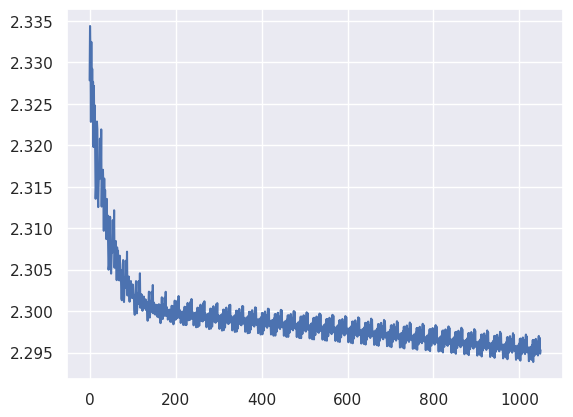

In [18]:
sns.lineplot(data=stuff["train_loss"])

In [ ]:
class NetModule(nn.Module):
    def __init__(self, layers):
        super(NetModule, self).__init__()
        self.hidden = nn.ModuleList()
        for inp,outp in zip(layers, layers[1: ]):
            self.hidden.append(nn.Linear(inp, outp))
    def forward(self, activation):
        L = len(self.hidden)

        for (l, linear_transform) in zip(range(L), self.hidden):
            if l<L-1:
                activation =torch.relu(linear_transform(activation))
            else:
                activation=linear_transform(activation)
        return activation
    # def forward(self, x):
    #     x = torch.sigmoid(self.linear1(x))
    #     x = torch.sigmoid(self.linear2(x))
    #     x = self.linear3(x)
    #     return x